## Assignment 3

I tried to write down as much as possible about what I am doing with the data. I'm not sure about if everything I explain is correct so if something I explain is not correct I would like to hear it. Thanks.

In [3]:
#Libraries
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import math
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [4]:
#CSV to read
df = pd.read_csv('data_Mashable.csv')
df.head()
#df.info()

id                                                url  n_tokens_title  \
0   1  http://mashable.com/2013/10/29/ashton-kutcher-...              10   
1   2  http://mashable.com/2014/09/08/mashies-sept-19...               9   
2   3  http://mashable.com/2013/02/01/hello-kitty-roc...              11   
3   4  http://mashable.com/2014/02/06/add-us-on-snapc...               8   
4   5  http://mashable.com/2014/01/07/lindsey-vonn-wi...               9   

   n_tokens_content  num_imgs  num_videos  average_token_length  \
0               821        12           0              4.518879   
1               489         6           0              5.040900   
2               131         0           1              4.877863   
3               556         2           0              4.974820   
4               880        18           0              4.928409   

   data_channel_is_lifestyle  data_channel_is_entertainment  \
0                          0                              0   
1                          0                              0   
2                          0                              0   
3                          0                              0   
4                          0                              0   

   data_channel_is_bus  ...  weekday_is_friday  weekday_is_saturday  \
0                    0  ...                  0                    0   
1                    0  ...                  0                    0   
2                    0  ...                  1                    0   
3                    1  ...                  0                    0   
4                    0  ...                  0                    0   

   weekday_is_sunday  is_weekend  global_subjectivity  \
0                  0           0             0.439379   
1                  0           0             0.300454   
2                  0           0             0.575486   
3                  0           0             0.327220   
4                  0           0             0.507709   

   global_sentiment_polarity  title_subjectivity  title_sentiment_polarity  \
0                   0.082486            0.666667                     0.375   
1                   0.027715            0.000000                     0.000   
2                   0.259120            0.000000                     0.000   
3                   0.134424            0.000000                     0.000   
4                   0.109256            0.000000                     0.000   

   shares  shares_log  
0    2100    3.322219  
1     274    2.437751  
2    1500    3.176091  
3    2000    3.301030  
4    6000    3.778151  

[5 rows x 27 columns]

# Linear regression

In a model with linear regression you can see in what extent certain variables in- or decrease. The x axis will always show the independent variable(s) and the y axis shows the dependent variable. The model shows a line which is based on all the scatters. Next to this there are some functions to show how much this shown graphic is reliable and in what extent you are able to declare a certain outcome.

For this research, 5 variables are taken with in the research. For this a subset is created. This 5 variables are gonna help to predict the shares. All these variables are gonna be compared to the shares or the shares log. The shares log is equal to the number of actual shares but works as a exponent.

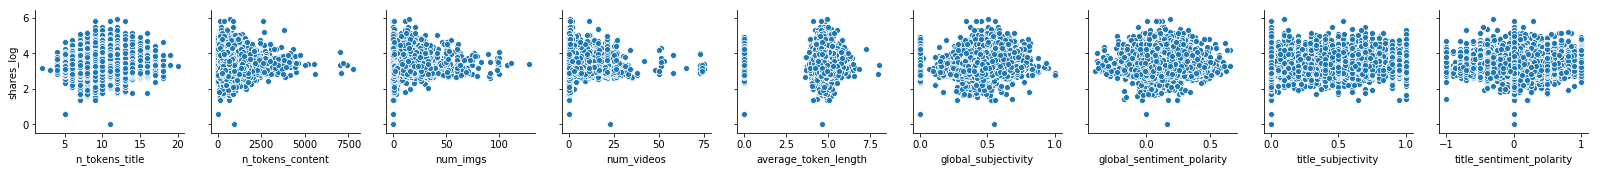

In [5]:
sns.pairplot(df,
             y_vars=["shares_log"],
             x_vars=['n_tokens_title', 'n_tokens_content', 'num_imgs', 'num_videos', 'average_token_length', 'global_subjectivity','global_sentiment_polarity','title_subjectivity','title_sentiment_polarity'])
plt.show()

To create the subset, the following 5 variabels are taken with.

In [35]:
df_subset = df[["n_tokens_title", "n_tokens_content", "num_imgs","num_videos","global_subjectivity"]]
df_subset.head(5)

n_tokens_title  n_tokens_content  num_imgs  num_videos  global_subjectivity
0              10               821        12           0             0.439379
1               9               489         6           0             0.300454
2              11               131         0           1             0.575486
3               8               556         2           0             0.327220
4               9               880        18           0             0.507709

In [7]:
y = df['shares_log'] #We need to take out shares as our Y-variable
X = df_subset #The 5 factors that help predict the amount of shares
X.index = df['url'] #To keep track on what article we're on
X.head()

n_tokens_title  \
url                                                                  
http://mashable.com/2013/10/29/ashton-kutcher-l...              10   
http://mashable.com/2014/09/08/mashies-sept-19-...               9   
http://mashable.com/2013/02/01/hello-kitty-rocket/              11   
http://mashable.com/2014/02/06/add-us-on-snapchat/               8   
http://mashable.com/2014/01/07/lindsey-vonn-wit...               9   

                                                    n_tokens_content  \
url                                                                    
http://mashable.com/2013/10/29/ashton-kutcher-l...               821   
http://mashable.com/2014/09/08/mashies-sept-19-...               489   
http://mashable.com/2013/02/01/hello-kitty-rocket/               131   
http://mashable.com/2014/02/06/add-us-on-snapchat/               556   
http://mashable.com/2014/01/07/lindsey-vonn-wit...               880   

                                                    num_imgs  num_videos  \
url                                                                        
http://mashable.com/2013/10/29/ashton-kutcher-l...        12           0   
http://mashable.com/2014/09/08/mashies-sept-19-...         6           0   
http://mashable.com/2013/02/01/hello-kitty-rocket/         0           1   
http://mashable.com/2014/02/06/add-us-on-snapchat/         2           0   
http://mashable.com/2014/01/07/lindsey-vonn-wit...        18           0   

                                                    global_subjectivity  
url                                                                      
http://mashable.com/2013/10/29/ashton-kutcher-l...             0.439379  
http://mashable.com/2014/09/08/mashies-sept-19-...             0.300454  
http://mashable.com/2013/02/01/hello-kitty-rocket/             0.575486  
http://mashable.com/2014/02/06/add-us-on-snapchat/             0.327220  
http://mashable.com/2014/01/07/lindsey-vonn-wit...             0.507709

# Train and test set

This 5 variables are taken because they could be factors to determin the amount of shares. We assume that these numbers increase the amount of shares and we are going to find out in what extent.

We split the dataset in 2 parts. One set will be the train set (70%) and the other part will be the test set (30%). We do this to make sure the model works for as well the train set as the test set. For instance, if we have a dataset with 10 000 rows and we have a 'working' model, will it still work if this dataset increases with 12 500? 

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) #Data has been split
X_train.head() #The train set

#(len(X_train)) 17499 rows
#(len(X_test)) 7500 rows

n_tokens_title  \
url                                                                  
http://mashable.com/2013/02/03/puppy-bowl-online/                7   
http://mashable.com/2014/09/11/bridesmaid-lost-...               9   
http://mashable.com/2013/03/08/facebook-acquire...               9   
http://mashable.com/2014/04/29/yahoo-mail-app-r...              12   
http://mashable.com/2013/08/28/chef-knife-moves...               8   

                                                    n_tokens_content  \
url                                                                    
http://mashable.com/2013/02/03/puppy-bowl-online/                141   
http://mashable.com/2014/09/11/bridesmaid-lost-...               392   
http://mashable.com/2013/03/08/facebook-acquire...               622   
http://mashable.com/2014/04/29/yahoo-mail-app-r...               251   
http://mashable.com/2013/08/28/chef-knife-moves...               940   

                                                    num_imgs  num_videos  \
url                                                                        
http://mashable.com/2013/02/03/puppy-bowl-online/          0           1   
http://mashable.com/2014/09/11/bridesmaid-lost-...         9           0   
http://mashable.com/2013/03/08/facebook-acquire...         1           0   
http://mashable.com/2014/04/29/yahoo-mail-app-r...        23           1   
http://mashable.com/2013/08/28/chef-knife-moves...        13           2   

                                                    global_subjectivity  
url                                                                      
http://mashable.com/2013/02/03/puppy-bowl-online/              0.451711  
http://mashable.com/2014/09/11/bridesmaid-lost-...             0.476976  
http://mashable.com/2013/03/08/facebook-acquire...             0.488495  
http://mashable.com/2014/04/29/yahoo-mail-app-r...             0.545746  
http://mashable.com/2013/08/28/chef-knife-moves...             0.507042

In [13]:
lm = LinearRegression() #create the model
model = lm.fit(X_train, y_train) #train the model

In [14]:
coef = pd.DataFrame(X.columns.values, lm.coef_) #This creates a smaller df with a column with the column names, and the coefficients of the model
coef

0
-0.002611       n_tokens_title
-0.000016     n_tokens_content
 0.004428             num_imgs
 0.003609           num_videos
 0.296838  global_subjectivity

As we can see the global subjectivity is the variable that influences the shares the most. Although, in this case it's still very little. To show the correlation, just the global subjectivity and the shares log is plotted below. As you can see, the shares increase if the global subjectivity increases (the linear line rises).

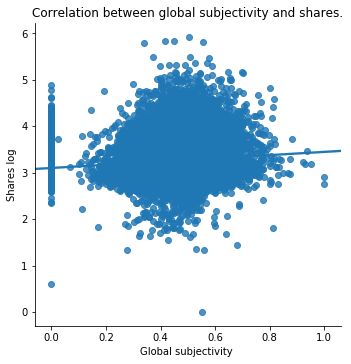

In [17]:
sns.lmplot(x='global_subjectivity', y='shares_log', data=df)
plt.title('Correlation between global subjectivity and shares.')
plt.xlabel("Global subjectivity ")
plt.ylabel("Shares log")
plt.show()

Now the predictive model is going to be created with the data we have. This prediction will show how many shares an article will have, based on the 5 variables which are selected. Another column is created with the predicted number of shares_log. The predicted number is deducted from the actual number, which ends up in the residual.

In [16]:
y_pred = lm.predict(X_test) #Generate the predictions
resid = y_pred - y_test #Get the residuals by subtracting the prediction from the actual shares
resid.head(4) #Some residuals

15754   -0.313205
19390    0.136683
1603    -0.063601
21118   -0.254624
Name: shares_log, dtype: float64

In the following graphic, the residuals and the shares log is plotted. In this plot you can see that the errors in the shares log are not more than ≈ -2 or +2 off. This seems little but it's a log number.

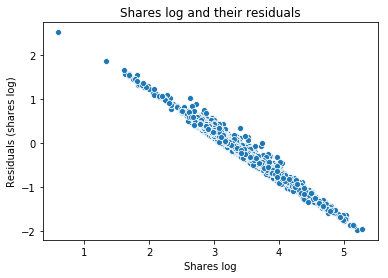

In [18]:
sns.scatterplot(x=y_test,y=resid,data=df)
plt.title('Shares log and their residuals')
plt.xlabel('Shares log')
plt.ylabel('Residuals (shares log)')
plt.show()

Here you can see if the prediction is correct next to the actual shares.

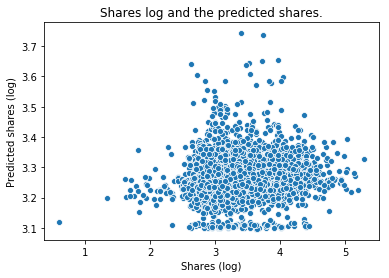

In [22]:
sns.scatterplot(x=y_test,y=y_pred)
plt.title('Shares log and the predicted shares.')
plt.xlabel('Shares (log)')
plt.ylabel('Predicted shares (log)')
plt.show()

In [25]:
y_test_p = lm.predict(X_test) #Generate predictions for the test data. So we use X.test, not X.train
r2_score(y_test, y_test_p)

0.017285975642393647

The model has an accuracy of 1.7%. It doesn't work well to predict the amount of shares. We will also calculate an RMSE. This shows how much the shares log is generally off.

In [27]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_test, y_test_p))

0.4025069568285302

In [28]:
10**(10 **(math.sqrt(mean_squared_error(y_test, y_test_p))))

336.06878810220894

To get back the actual number of shares and not the log the following calculations are being made.

In [28]:
y = 3.3222
# y=
10**(y)

2099.9067037624263

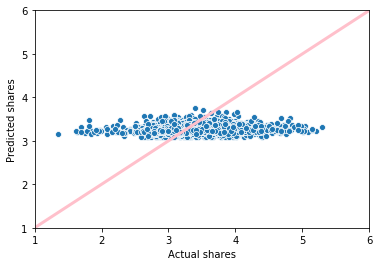

In [14]:
sns.scatterplot(y_test, y_test_p)
plt.xlabel('Actual shares')
plt.ylabel('Predicted shares')
plt.xlim([1,6]) #Forcing the x- and y-axis to be the same length, so that we can compare 
plt.ylim([1,6])
plt.plot([1, 6], [1, 6], color='pink', lw=3) #Plot a diagonal length
plt.show()

This graphic shows that the model is not working well. This is shown with a red line (which is perfectly related). The scatters are not following the red line.